In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import math

In [11]:
def regSummary(y_true, y_pred):
    return{
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred))
    }

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## imputing the null values

In [5]:
imputer = SimpleImputer()
imputer.set_output(transform="pandas")
df2 =  imputer.fit_transform(df.drop(columns='ocean_proximity'))

In [6]:
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
df2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Data x and y splitting

In [8]:
data_x = df2.drop(columns="median_house_value")
data_y = df2["median_house_value"]

In [9]:
scaler = StandardScaler()
scaler.set_output(transform="pandas")
data_x = scaler.fit_transform(data_x)

## Train Test Splitting

In [10]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)

## Creating A SGD model and learing curve on max_iter

In [12]:
sgd_reg = SGDRegressor()

In [39]:
grid_search = GridSearchCV(
    sgd_reg,
    param_grid={
        "max_iter": np.arange(100, 2000,10),
        "early_stopping": [False, True]
    }, verbose = 3, n_jobs=3
)

In [40]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits


GridSearchCV(estimator=SGDRegressor(), n_jobs=3,
             param_grid={'early_stopping': [False, True],
                         'max_iter': array([ 100,  110,  120,  130,  140,  150,  160,  170,  180,  190,  200,
        210,  220,  230,  240,  250,  260,  270,  280,  290,  300,  310,
        320,  330,  340,  350,  360,  370,  380,  390,  400,  410,  420,
        430,  440,  450,  460,  470,  480,  490,  500,  510,  520,  530,
        540,  550,  560,  570,  580,  590,  600,  610,  620,  630,  640,
        650,  660,  670,  680,  690,  700...
       1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410,
       1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520,
       1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630,
       1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740,
       1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850,
       1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960,
       1970, 1980, 1990])},
             verbose=3)

In [41]:
grid_search.best_estimator_

SGDRegressor(early_stopping=True, max_iter=1050)

In [42]:
grid_search.best_score_

0.6295639574563104

In [43]:
grid_summary = pd.DataFrame({
    "score": grid_search.cv_results_["mean_test_score"],
    "max_iter": grid_search.cv_results_["param_max_iter"],
    "early_stopping":grid_search.cv_results_["param_early_stopping"],
})
grid_summary.head()

,score,max_iter,early_stopping
0,0.628628,100,False
1,0.629177,110,False
2,0.628298,120,False
3,0.627192,130,False
4,0.628705,140,False


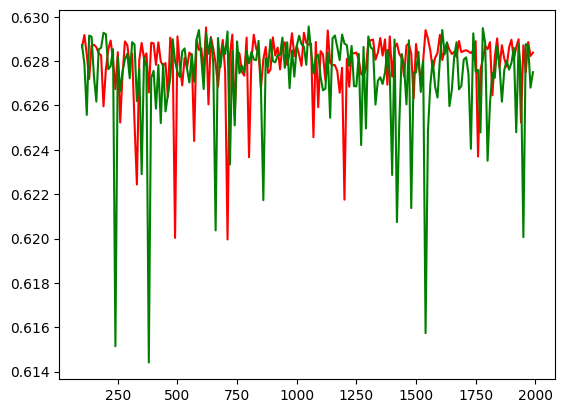

In [44]:
fig, ax = plt.subplots()

early_stop = grid_summary.groupby("early_stopping")


ax.plot(early_stop.get_group(False)["max_iter"], 
        early_stop.get_group(False)["score"], color="red", label='early_stop False')

ax.plot(early_stop.get_group(True)["max_iter"], 
        early_stop.get_group(True)["score"], color='green', label="early_stop True")
plt.show()

In [85]:
def Grid_Search(param_grid,x,y, xlabel, ylabel, cols, group_by1,group_by2=None):
    
    sgd_reg = SGDRegressor()
    grid_search = GridSearchCV(sgd_reg, param_grid=param_grid, verbose = 3, n_jobs=3)

    grid_search.fit(x, y)

    
    grid_db_dict = {"score": grid_search.cv_results_["mean_test_score"]}
    for col in cols:
        grid_db_dict[col] = grid_search.cv_results_[f"param_{col}"]
    grid_summary = pd.DataFrame(grid_db_dict)

    
    n_groups_set = grid_summary.groupby(group_by2)

    fig, ax = plt.subplots(figsize=(16,2*10), nrows=5, ncols=2)

    axes = ax.flat
    n_groups = grid_search.get_params()["param_grid"][group_by2]
    for group in n_groups:
        groups =  n_groups_set.get_group(group)
        early_stop = groups.groupby(group_by1)

        ax = next(axes)
        ax.set_title(f"{group_by2}: {group}")
        ax.plot(early_stop.get_group(False)["max_iter"], 
                early_stop.get_group(False)["score"], color="red", label='early_stop False')

        ax.plot(early_stop.get_group(True)["max_iter"], 
                early_stop.get_group(True)["score"], color='green', label="early_stop True")
    
    print({
        "best_estimator": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_
    })
    plt.show()

**Tuning the n_iter_no_change with early stopping.**

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


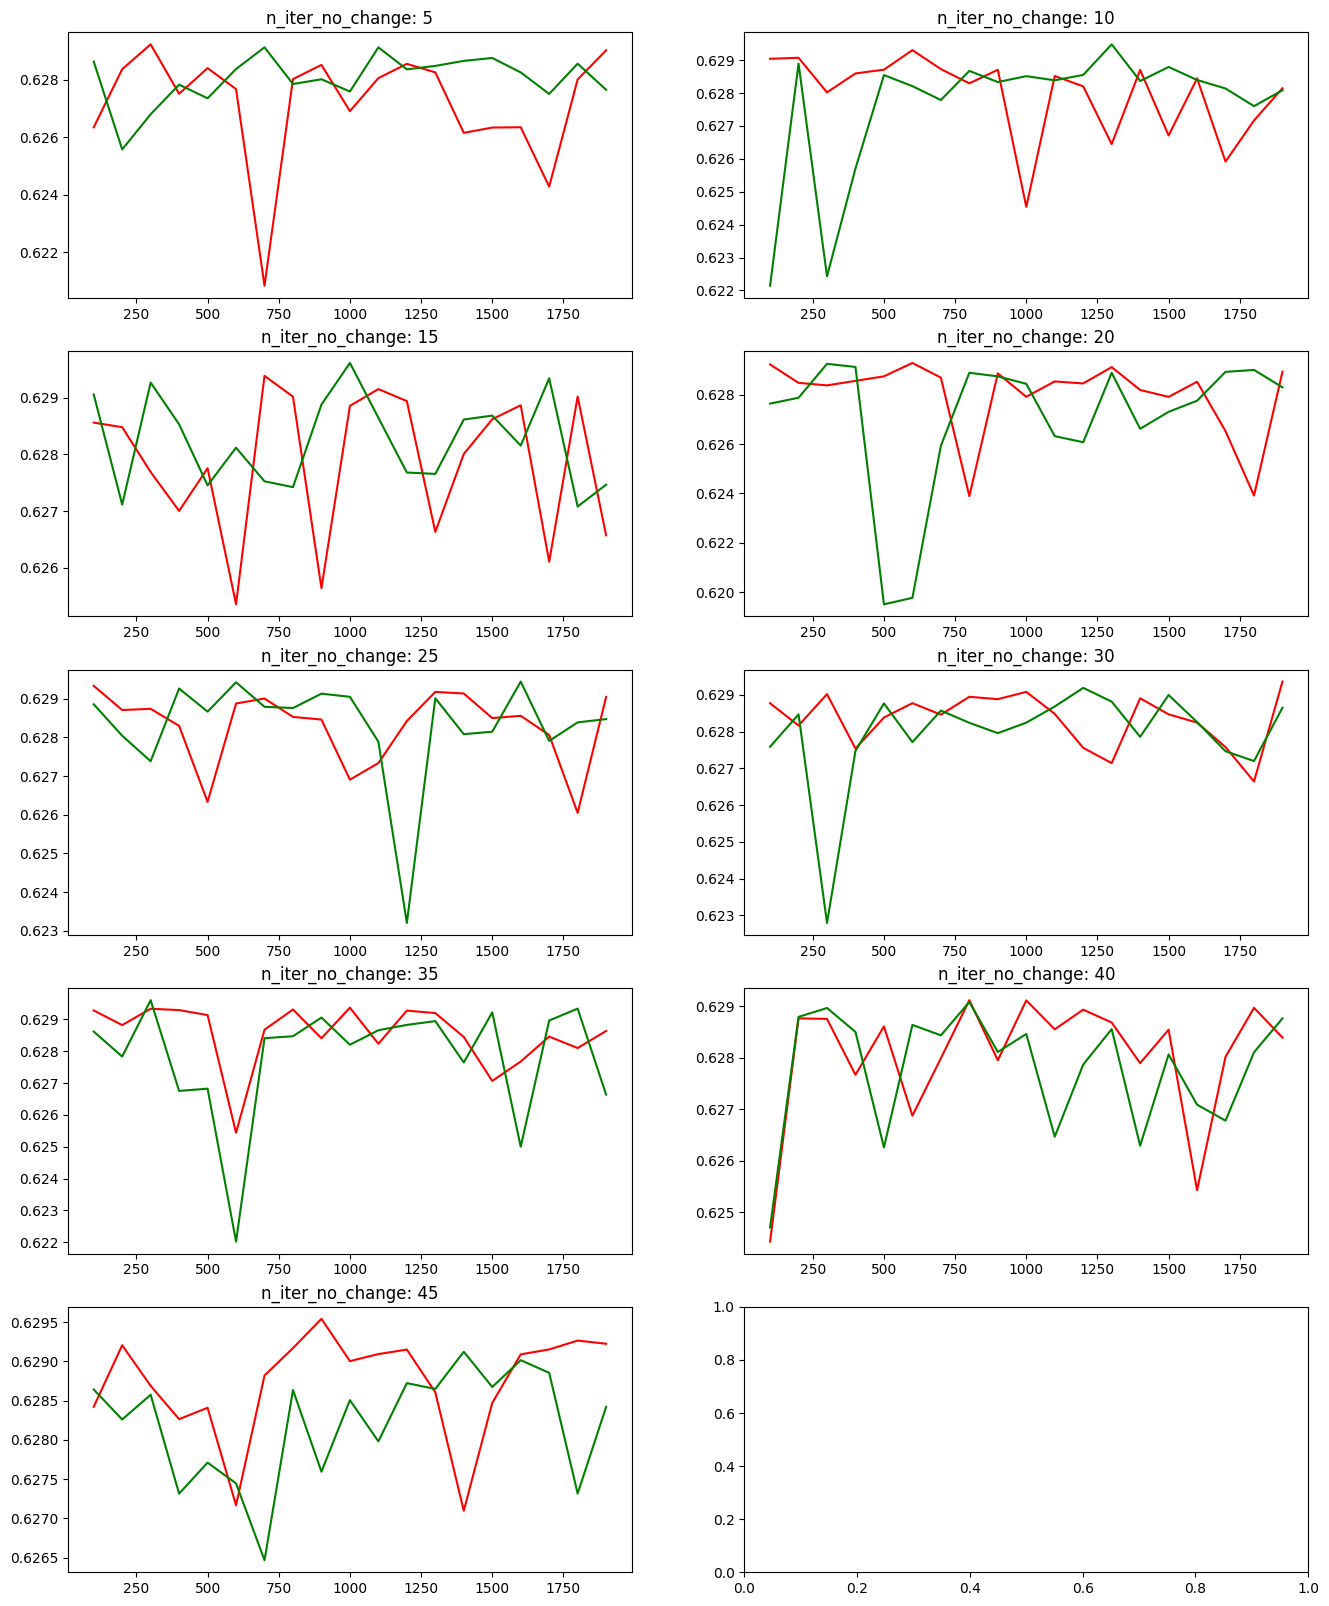

In [71]:
Grid_Search({
        "max_iter": np.arange(100, 2000,100),
        "early_stopping": [False, True],
        "n_iter_no_change": np.arange(5,50,5)
    }, train_x, train_y, "max_iter","score", 
            ["max_iter","early_stopping", "n_iter_no_change"],"early_stopping","n_iter_no_change")

### Constant Learning Rate

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
{'best_estimator': SGDRegressor(early_stopping=True, learning_rate='constant', max_iter=700,
             n_iter_no_change=20), 'best_params': {'early_stopping': True, 'learning_rate': 'constant', 'max_iter': 700, 'n_iter_no_change': 20}, 'best_score': 0.6237427810967924}


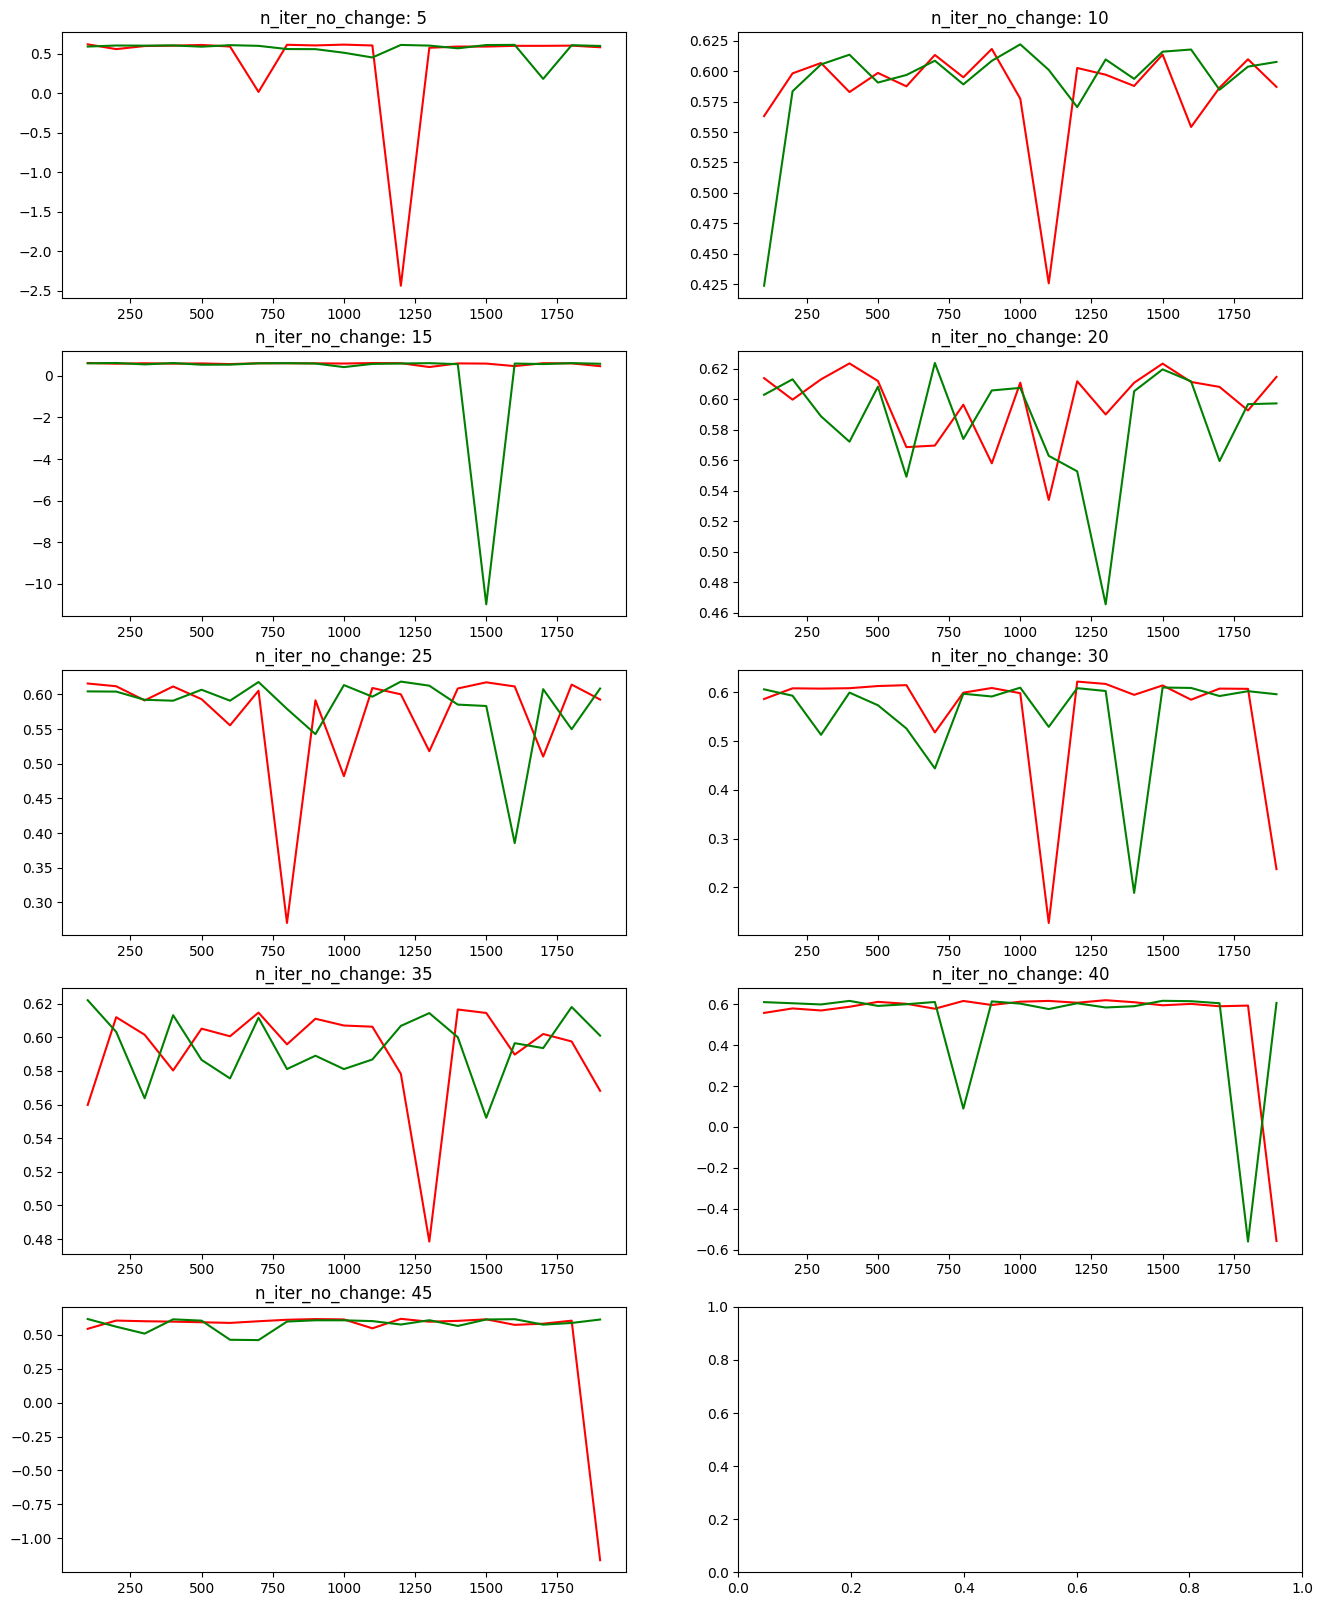

In [73]:
Grid_Search({
        "max_iter": np.arange(100, 2000,100),
        "early_stopping": [False, True],
        "n_iter_no_change": np.arange(5,50,5),
        "learning_rate":["constant"]
    }, train_x, train_y, "max_iter","score", 
            ["max_iter","early_stopping", "n_iter_no_change"],"early_stopping","n_iter_no_change")

Fitting 5 folds for each of 580 candidates, totalling 2900 fits
{'best_estimator': SGDRegressor(early_stopping=True, eta0=0.0001, learning_rate='constant',
             max_iter=1800, n_iter_no_change=20), 'best_params': {'early_stopping': True, 'eta0': 0.0001, 'learning_rate': 'constant', 'max_iter': 1800, 'n_iter_no_change': 20}, 'best_score': 0.62977366585123}


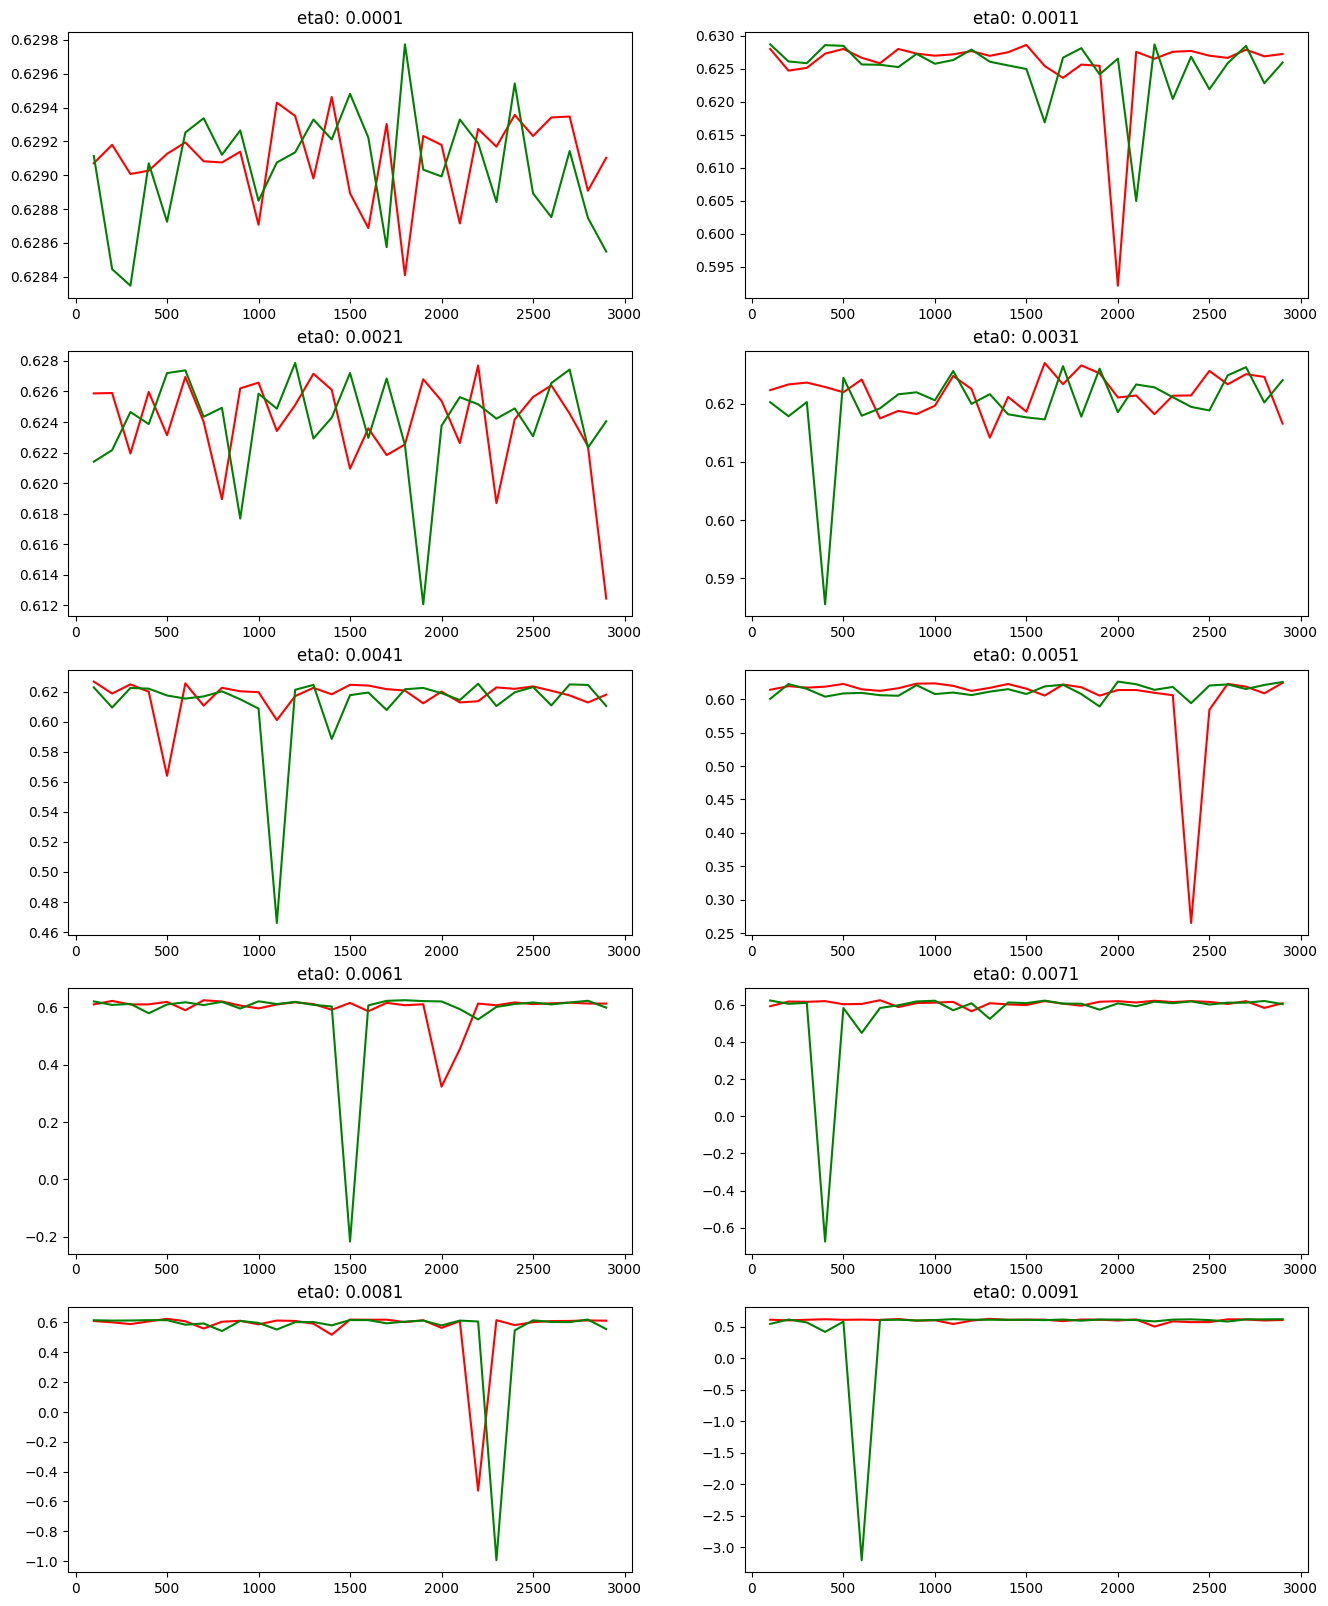

In [87]:
Grid_Search({
        "max_iter": np.arange(100, 3000,100),
        "early_stopping": [False, True],
        "n_iter_no_change":[20],
        "learning_rate":["constant"],
        "eta0":np.arange(0.0001,0.01, 0.001)
    }, train_x, train_y, "max_iter","score", 
            ["max_iter","early_stopping", "eta0"],"early_stopping","eta0")

In [77]:
np.arange(0.0001,0.01, 0.001)

array([0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071,
       0.0081, 0.0091])

In [82]:
grid_search.get_params()["param_grid"]

{'max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
        1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
 'early_stopping': [False, True],
 'n_iter_no_change': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])}